In [18]:
import dask.dataframe as dd

In [19]:
data = dd.read_csv("C:\\Users\\Bismark\\Desktop\\Mike_Ansah_assignments\\Sec_Sem\\Dask\\ks_projects16.csv",encoding = 'ANSI',dtype={'Unnamed: 13': 'object',
       'Unnamed: 14': 'object',
       'Unnamed: 15': 'object'})

In [20]:
print(data.divisions)

(None, None)


In [21]:
print(data.npartitions)

1


In [23]:
#Inspecting columns
data.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [ ]:
data.compute()

In [ ]:
data.head()

In [26]:
data = data.repartition(npartitions=10) 

In [27]:
print(data.npartitions)

10


In [29]:
data.map_partitions(len).compute() 

0    32375
1    32375
2    32375
3    32375
4    32375
5    32375
6    32375
7    32375
8    32375
9    32375
dtype: int64

In [33]:
#Some unwanted columns which have been added to the dataframe needs to be dropped 
data_2 = data.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])  

In [34]:
data_2.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged '],
      dtype='object')

In [35]:
data_2.compute()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200


In [36]:
#Renaming column names because it has spaces attached

data_2_renamed = data_2.rename(columns={'ID ':'ID','name ':'name','category ':'category','main_category ':'main_category',
                                       'currency ':'currency','deadline ':'deadline','goal ':'goal','launched ':'launched',
                                       'pledged ':'pledged','state ':'state','backers ':'backers','country ':'country',
                                       'usd pledged ':'usd_pledged'})

In [37]:
data_2_renamed.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged'],
      dtype='object')

In [39]:
data_2_renamed.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [40]:
#Checking for missing values

missing_values = data_2_renamed.isnull().sum()

In [42]:
missing_values.compute()

ID                  0
name                4
category            5
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged      3790
dtype: int64

In [44]:
percent_missing = ((missing_values / data_2_renamed.index.size) * 100)

In [45]:
percent_missing.compute()

ID               0.000000
name             0.001236
category         0.001544
main_category    0.000000
currency         0.000000
deadline         0.000000
goal             0.000000
launched         0.000000
pledged          0.000000
state            0.000000
backers          0.000000
country          0.000000
usd_pledged      1.170656
dtype: float64

In [48]:
data_2_renamed_1 = data_2_renamed.dropna()

In [49]:
data_2_renamed_1.isnull().sum().compute()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd_pledged      0
dtype: int64

In [51]:
data_2_renamed_1.dtypes

ID                int64
name             object
category         object
main_category    object
currency         object
deadline         object
goal             object
launched         object
pledged          object
state            object
backers          object
country          object
usd_pledged      object
dtype: object

In [52]:
data_2_renamed_1["goal"] = dd.to_numeric(data_2_renamed_1["goal"], errors="coerce")

In [53]:
data_2_renamed_1.dtypes

ID                int64
name             object
category         object
main_category    object
currency         object
deadline         object
goal              int64
launched         object
pledged          object
state            object
backers          object
country          object
usd_pledged      object
dtype: object

In [54]:
data_2_renamed_1["pledged"] = dd.to_numeric(data_2_renamed_1["pledged"], errors="coerce")
data_2_renamed_1["backers"] = dd.to_numeric(data_2_renamed_1["backers"], errors="coerce")
data_2_renamed_1["usd_pledged"] = dd.to_numeric(data_2_renamed_1["usd_pledged"], errors="coerce")

In [56]:
data_2_renamed_1.dtypes

ID                int64
name             object
category         object
main_category    object
currency         object
deadline         object
goal              int64
launched         object
pledged           int64
state            object
backers           int64
country          object
usd_pledged       int64
dtype: object

In [57]:
data_2_renamed_1.describe().compute()

,ID,goal,pledged,backers,usd_pledged
count,3.199510e+05,3.193240e+05,3.193320e+05,319333.000000,3.193330e+05
mean,1.074863e+09,4.764773e+04,8.764347e+03,103.122115,7.847557e+03
std,6.194008e+08,1.146311e+06,8.998067e+04,953.333335,8.468339e+04
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,6.976136e+08,2.000000e+03,3.100000e+01,2.000000,2.543215e+01
50%,1.191932e+09,5.400000e+03,6.270000e+02,13.000000,5.500000e+02
75%,1.662490e+09,1.600000e+04,4.075000e+03,57.000000,3.647000e+03
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07


In [58]:
data_2_renamed_1.isnull().sum().compute()

ID                 0
name               0
category           0
main_category      0
currency           0
deadline           0
goal             627
launched           0
pledged          619
state              0
backers          618
country            0
usd_pledged      618
dtype: int64

In [59]:
data_2_renamed_2 = data_2_renamed_1.dropna()

In [60]:
data_2_renamed_2.isnull().sum().compute()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd_pledged      0
dtype: int64

In [62]:
data_2_renamed_2.describe().compute()

,ID,goal,pledged,backers,usd_pledged
count,3.193240e+05,3.193240e+05,3.193240e+05,319324.000000,3.193240e+05
mean,1.074819e+09,4.764773e+04,8.764171e+03,102.842383,7.847774e+03
std,6.193765e+08,1.146311e+06,8.998171e+04,940.388924,8.468457e+04
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,6.976136e+08,2.000000e+03,3.100000e+01,2.000000,2.550000e+01
50%,1.191932e+09,5.400000e+03,6.270000e+02,13.000000,5.500000e+02
75%,1.609579e+09,1.600000e+04,4.075000e+03,57.000000,3.647250e+03
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07


In [63]:
data_2_renamed_2["deadline"] = dd.to_datetime(data_2_renamed_2["deadline"], errors="coerce")

In [64]:
data_2_renamed_2["launched"] = dd.to_datetime(data_2_renamed_2["launched"], errors="coerce")

In [66]:
data_2_renamed_2.dtypes

ID                        int64
name                     object
category                 object
main_category            object
currency                 object
deadline         datetime64[ns]
goal                      int64
launched         datetime64[ns]
pledged                   int64
state                    object
backers                   int64
country                  object
usd_pledged               int64
dtype: object

In [75]:
data_2_renamed_2['deadline'].head()

0   2015-10-09 11:36:00
1   2013-02-26 00:20:50
2   2012-04-16 04:24:11
3   2015-08-29 01:00:00
4   2016-04-01 13:38:27
Name: deadline, dtype: datetime64[ns]

In [77]:
print(data_2_renamed_2.npartitions)

10


In [78]:
#Saving a copy of the data to disk
data_2_renamed_2.repartition(npartitions=1).to_csv("C:\\Users\\Bismark\\Desktop\\Mike_Ansah_assignments\\Sec_Sem\\Dask\\kick_data_cleaned_1.csv")

['C:/Users/Bismark/Desktop/Mike_Ansah_assignments/Sec_Sem/Dask/kick_data_cleaned_1.csv\\0.part']

(0.0, 21355935.583499998)

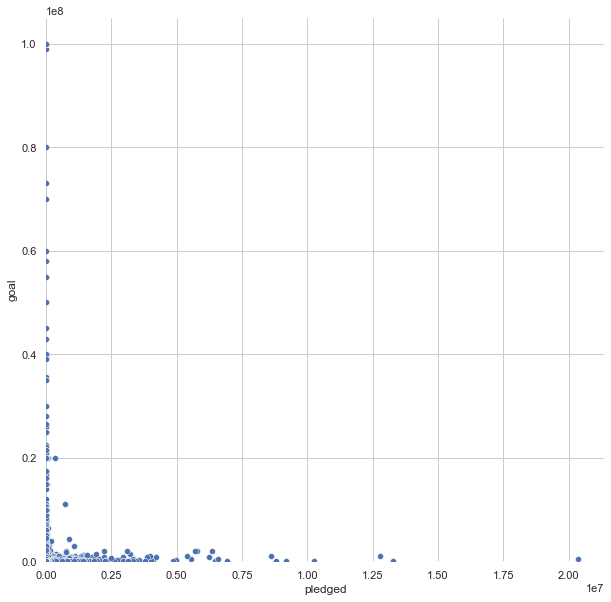

In [96]:
#Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="pledged", y="goal",data=data_2_renamed_2.compute(), ax=ax)
#sns.regplot(x="goal", y="pledged",data=data_2_renamed_2.compute(), ax=ax,order=2)

plt.ylim(ymin=0)
plt.xlim(xmin=0)

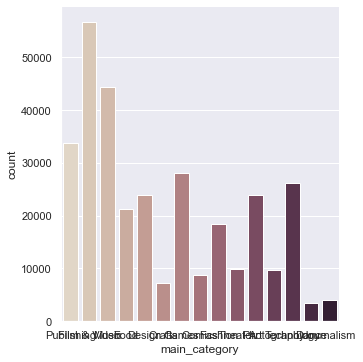

In [91]:
sns.set(rc={'figure.figsize':(100,50)})

sns.catplot(x="main_category", kind="count", palette="ch:.25", data= data_2_renamed_2.compute())

<AxesSubplot:xlabel='state', ylabel='pledged'>

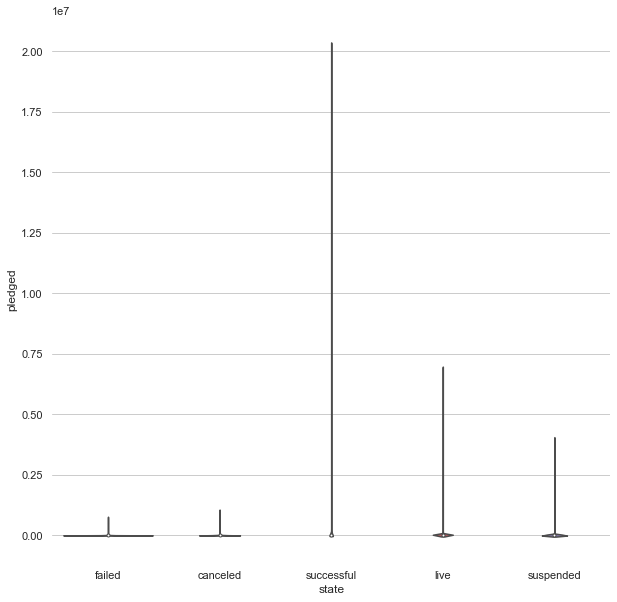

In [99]:
#Creating voilinplot between state and goal

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

sns.violinplot(x="state", y="pledged", data=data_2_renamed_2.compute(), ax=ax)

In [100]:
data_2_renamed_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US,52375.0


In [101]:
data_2_renamed_2["deadline_year"] = data_2_renamed_2.deadline.dt.year

In [102]:
data_2_renamed_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,deadline_year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,2015
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,2013
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,2012
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,2015
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US,52375.0,2016


In [103]:
data_2_renamed_2["deadline_month"] = data_2_renamed_2.deadline.dt.month
data_2_renamed_2["deadline_day"] = data_2_renamed_2.deadline.dt.day
data_2_renamed_2["deadline_hour"] = data_2_renamed_2.deadline.dt.hour
data_2_renamed_2["deadline_min"] = data_2_renamed_2.deadline.dt.minute
data_2_renamed_2["deadline_sec"] = data_2_renamed_2.deadline.dt.second 

In [104]:
data_2_renamed_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,deadline_year,deadline_month,deadline_day,deadline_hour,deadline_min,deadline_sec
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,2015,10,9,11,36,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,2013,2,26,0,20,50
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,2012,4,16,4,24,11
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,2015,8,29,1,0,0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US,52375.0,2016,4,1,13,38,27


In [105]:
# Breaking down the date variable launched
data_2_renamed_2["launched_year"] = data_2_renamed_2.launched.dt.year
data_2_renamed_2["launched_month"] = data_2_renamed_2.launched.dt.month
data_2_renamed_2["launched_day"] = data_2_renamed_2.launched.dt.day
data_2_renamed_2["launched_hour"] = data_2_renamed_2.launched.dt.hour
data_2_renamed_2["launched_min"] = data_2_renamed_2.launched.dt.minute
data_2_renamed_2["launched_sec"] = data_2_renamed_2.launched.dt.second 

In [106]:
data_2_renamed_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,...,9,11,36,0,2015,8,11,12,12,28
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,...,26,0,20,50,2013,1,12,0,20,50
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,...,16,4,24,11,2012,3,17,3,24,11
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,29,1,0,0,2015,7,4,8,35,3
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,...,1,13,38,27,2016,2,26,13,38,27


In [107]:
#Drop unwanted columns ID, name and category

data_2_renamed_2_new = data_2_renamed_2.drop(columns=['ID', 'name', 'category', 'deadline','launched']) 

In [108]:
data_2_renamed_2_new.head()

,main_category,currency,goal,pledged,state,backers,country,usd_pledged,deadline_year,deadline_month,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec
0,Publishing,GBP,1000.0,0.0,failed,0.0,GB,0.0,2015,10,9,11,36,0,2015,8,11,12,12,28
1,Film & Video,USD,45000.0,220.0,failed,3.0,US,220.0,2013,2,26,0,20,50,2013,1,12,0,20,50
2,Music,USD,5000.0,1.0,failed,1.0,US,1.0,2012,4,16,4,24,11,2012,3,17,3,24,11
3,Film & Video,USD,19500.0,1283.0,canceled,14.0,US,1283.0,2015,8,29,1,0,0,2015,7,4,8,35,3
4,Food,USD,50000.0,52375.0,successful,224.0,US,52375.0,2016,4,1,13,38,27,2016,2,26,13,38,27


In [113]:
data_2_renamed_2_new = data_2_renamed_2_new.drop(columns=['usd_pledged'])

In [114]:
data_2_renamed_2_new.columns

Index(['main_category', 'currency', 'goal', 'pledged', 'state', 'backers',
       'country', 'deadline_year', 'deadline_month', 'deadline_day',
       'deadline_hour', 'deadline_min', 'deadline_sec', 'launched_year',
       'launched_month', 'launched_day', 'launched_hour', 'launched_min',
       'launched_sec'],
      dtype='object')

In [115]:
data_2_renamed_2_new.head()

,main_category,currency,goal,pledged,state,backers,country,deadline_year,deadline_month,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec
0,Publishing,GBP,1000.0,0.0,failed,0.0,GB,2015,10,9,11,36,0,2015,8,11,12,12,28
1,Film & Video,USD,45000.0,220.0,failed,3.0,US,2013,2,26,0,20,50,2013,1,12,0,20,50
2,Music,USD,5000.0,1.0,failed,1.0,US,2012,4,16,4,24,11,2012,3,17,3,24,11
3,Film & Video,USD,19500.0,1283.0,canceled,14.0,US,2015,8,29,1,0,0,2015,7,4,8,35,3
4,Food,USD,50000.0,52375.0,successful,224.0,US,2016,4,1,13,38,27,2016,2,26,13,38,27


In [ ]:
#Logistic regression

from dask_ml.linear_model import LogisticRegression
from dask_ml.model_selection import train_test_split

X = feature_array
y = target_array.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LogisticRegression()

with ProgressBar():
lr.fit(X_train, y_train)

#Scoring the model
lr.score(X_test, y_test).compute()

In [ ]:
#Naive Bayes model
# Use the incremental wrapper

from sklearn.naive_bayes import BernoulliNB
from dask_ml.wrappers import Incremental

nb = BernoulliNB()
parallel_nb = Incremental(nb)

with ProgressBar():
    parallel_nb.fit(X_train, y_train, classes=[0,1])
    
#Scoring
parallel_nb.score(X_test, y_test)